In [22]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in merged file
df = pd.read_csv(folder_path + 'concatenated_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score'])

print(df.head(5))

                          participantId  bodyMass_kg  height_m        bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174       51.256    1.5748  20.667783   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371       59.874    1.6510  21.965653   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661       59.874    1.7018  20.673844   
3  041d9018-9fcb-4cdc-9539-9021602ba36c       83.915    1.7780  26.544594   
4  05fbf759-fcc0-4f5c-b871-f6a0d7f677b0      115.666    1.8796  32.739711   

   mean_hr/s  hr_duration_(s)  max_hr  min_hr  totalSteps  stepsTotalDuration  \
0   1.438426             47.0   1.783   1.017      4454.0              6366.0   
1   1.290195             41.0   1.517   1.150        61.0              1441.0   
2   1.107266             64.0   1.783   0.617     10790.0             20098.0   
3   2.107395            309.0   2.483   0.767      1360.0              2075.0   
4   1.284512             41.0   1.483   1.033      7532.0             10066.0   

   totalDistance  dwrTotalDuration  ssq_score  
0 

In [23]:
# Train test split

from sklearn.model_selection import GroupKFold


# Split the data ensuring that participants are not split between the train and test set
#train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['participantId'])

gkf = GroupKFold(n_splits=5)
for train_index, test_index in gkf.split(df, groups=df['participantId']):
    train, test = df.iloc[train_index], df.iloc[test_index]

train[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score']]
test[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score']]
                              

# Save the train and test data
train.to_csv(save_path + 'train.csv', index=False)
test.to_csv(save_path + 'test.csv', index=False)

In [26]:
# Train initial model
# Import the model
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Define the features and target
features = ['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration']
target = 'ssq_score'

# Fit the model
model.fit(train[features], train[target])

# Make predictions
train['prediction'] = model.predict(train[features])
test['prediction'] = model.predict(test[features])



C:\Users\aoife\AppData\Local\Temp\ipykernel_21984\505363315.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = model.predict(train[features])
C:\Users\aoife\AppData\Local\Temp\ipykernel_21984\505363315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


In [27]:
# Evaluate the model

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
train_mse = mean_squared_error(train['ssq_score'], train['prediction'])
test_mse = mean_squared_error(test['ssq_score'], test['prediction'])

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

# Calculate the absolute errors




Train Mean Squared Error: 1.3975990634308595
Test Mean Squared Error: 0.8416883851341507


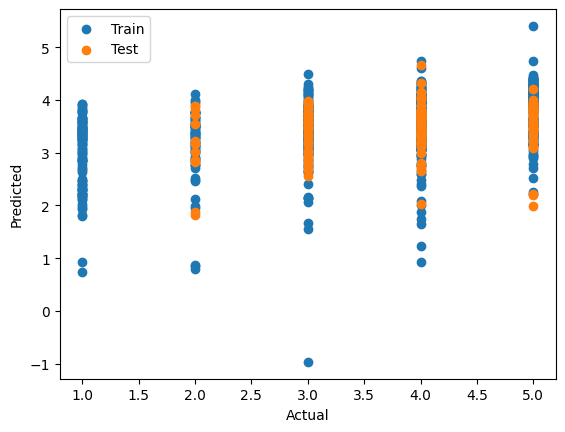

In [28]:
# plot the results

import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.scatter(train['ssq_score'], train['prediction'], label='Train')
plt.scatter(test['ssq_score'], test['prediction'], label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


